<a href="https://colab.research.google.com/github/KajalPourjalil/NLP_Project/blob/main/nlp_project%2C_bert_base_uncased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip install transformers datasets accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached nvidia_cublas_

In [ ]:
import transformers
print(transformers.__version__)

4.40.2


In [ ]:
!pip install transformers==4.37.2 PEFT==0.10.0

Found existing installation: transformers 4.40.2
Uninstalling transformers-4.40.2:
  Successfully uninstalled transformers-4.40.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 83.0 MB/s eta 0:00:00


# Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import pickle
import ast
import numpy as np
import torch
from transformers import BertTokenizerFast
import datasets
import accelerate

# Data Cleaning

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/nlp project/squad_train_fil.csv', sep=";", encoding= "utf-8-sig")
df2 = pd.read_csv('/content/drive/MyDrive/nlp project/squad_val.csv', sep=";", encoding= "utf-8-sig")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# Dropping useless columns

In [ ]:
columns_to_drop_numbers = ['id.1', 'id', 'answers']

df1 = df1.drop(columns = columns_to_drop_numbers)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64550 entries, 0 to 64549
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           64550 non-null  object 
 1   context         64550 non-null  object 
 2   question        64550 non-null  object 
 3   answer_text     64550 non-null  object 
 4   answer_start.1  64550 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [ ]:
columns_to_drop_numbers = ['id','answers', 'Final', 'answer_start']

df2 = df2.drop(columns = columns_to_drop_numbers)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           8529 non-null   object
 1   context         8529 non-null   object
 2   question        8529 non-null   object
 3   answer_text     8529 non-null   object
 4   answer_start.1  8529 non-null   object
dtypes: object(5)
memory usage: 333.3+ KB


## Save in Pickle

In [ ]:
with open('/content/drive/MyDrive/nlp project/df1.pkl', 'wb') as f:
    pickle.dump(df1, f)

In [ ]:
with open('/content/drive/MyDrive/nlp project/df2.pkl', 'wb') as f:
    pickle.dump(df2, f)

# Load from Pickle

In [ ]:
with open('/content/drive/MyDrive/nlp project/df1.pkl', 'rb') as f:
    df1 = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/nlp project/df2.pkl', 'rb') as f:
    df2 = pickle.load(f)

# Preprocessing and Tokenization

In [ ]:
!nvidia-smi

Fri May 23 13:07:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   43C    P8             17W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.current_device())  # Should return the current device (0 for the first GPU)
print(torch.cuda.get_device_name(0))  # Should return the name of the GPU

True
0
NVIDIA L4


In [ ]:
# import train_dataloader
# Initialize the tokenizer
from transformers import BertForQuestionAnswering
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Move the model to the GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)
print(f"Model is on device: {next(model.parameters()).device}")


# Function to safely parse answer values
def parse_answer(ans):
    if isinstance(ans, str):
        try:
            return ast.literal_eval(ans)
        except (SyntaxError, ValueError):
            return None
    elif isinstance(ans, dict):
        return ans
    return None

def add_token_positions(df):
    contexts = df['context'].tolist()
    questions = df['question'].tolist()

    answer_text = df['answer_text'].tolist()
    # df = df[df['answer_text'].notna()]

    # answer_starts = df['answer_start.1'].tolist()
    df['answer_start.1'] = pd.to_numeric(df['answer_start.1'], errors='coerce').fillna(0).astype(int)
    answer_starts = df['answer_start.1'].tolist()



    encodings = tokenizer(
        questions,
        contexts,
        truncation=True,
        padding=True,
        return_offsets_mapping=True
    )

    start_positions = []
    end_positions = []

    for i in range(len(answer_text)):
        offsets = encodings['offset_mapping'][i]
        answer_start = answer_starts[i]
        # answer_end = answer_start + len(answer_start[i])
        answer_end = answer_start + len(answer_text[i])  # ✅ Correct



        start_idx = None
        end_idx = None

        for idx, (start, end) in enumerate(offsets):
            if start <= answer_start < end:
                start_idx = idx
            if start < answer_end <= end:
                end_idx = idx
                break

        if start_idx is None:
            start_idx = 0
        if end_idx is None:
            end_idx = start_idx

        start_positions.append(start_idx)
        end_positions.append(end_idx)

    encodings.pop("offset_mapping")
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

    return encodings

train_encodings_1 = add_token_positions(df1)
val_encodings_1 = add_token_positions(df2)

class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        # Move tensors to the device within __getitem__
        # return {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

# Remove the extra 'device' argument when creating instances
train_dataset = SquadDataset(train_encodings_1)
val_dataset = SquadDataset(val_encodings_1)

for batch in train_dataset:
    batch = {k: v.to(device) for k, v in batch.items()}

# for batch in train_dataloader:
#     batch = {k: v.to(device) for k, v in batch.items()}  # Move each batch to GPU
#     outputs = model(**batch)  # Now this runs on GPU

print(f"Model is on device: {next(model.parameters()).device}")
batch = next(iter(train_dataset))
print({k: v.device for k, v in batch.items()})  # Should print 'cuda' for all tensors

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model is on device: cuda:0
Model is on device: cuda:0
{'input_ids': device(type='cpu'), 'token_type_ids': device(type='cpu'), 'attention_mask': device(type='cpu'), 'start_positions': device(type='cpu'), 'end_positions': device(type='cpu')}


In [ ]:
print(len(train_encodings_1['input_ids']))
print(len(train_encodings_1['start_positions']))
print(len(train_encodings_1['end_positions']))

64550
64550
64550


# Convert encodings to a dataset for Pytorch and Tensorflow

In [ ]:
from torch.utils.data import DataLoader
# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Move batch to device
for batch in train_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)  # Model inference
    break  # Run only one batch for testing

print(f"Model is on device: {next(model.parameters()).device}")
print({k: v.device for k, v in batch.items()})
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())

Model is on device: cuda:0
{'input_ids': device(type='cuda', index=0), 'token_type_ids': device(type='cuda', index=0), 'attention_mask': device(type='cuda', index=0), 'start_positions': device(type='cuda', index=0), 'end_positions': device(type='cuda', index=0)}
2898053120
2952790016


In [ ]:
import torch
from transformers import BertTokenizerFast, BertForQuestionAnswering
from torch.utils.data import DataLoader, Dataset

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dummy data
questions = ["What is your name?"] * 10
contexts = ["My name is ChatGPT."] * 10
answers = ["ChatGPT"] * 10
starts = [11] * 10

encodings = tokenizer(questions, contexts, truncation=True, padding=True, return_offsets_mapping=True)
encodings.pop("offset_mapping")
encodings.update({'start_positions': starts, 'end_positions': [18]*10})

class SquadDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __len__(self):
        return len(self.encodings['input_ids'])
    def __getitem__(self, idx):
        return {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}

dataset = SquadDataset(encodings)
loader = DataLoader(dataset, batch_size=2)

model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)

# Run a test batch
for batch in loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    print({k: v.device for k, v in batch.items()})
    with torch.no_grad():
        outputs = model(**batch)
    break

print("CUDA Allocated:", torch.cuda.memory_allocated())
print("CUDA Reserved:", torch.cuda.memory_reserved())


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': device(type='cuda', index=0), 'token_type_ids': device(type='cuda', index=0), 'attention_mask': device(type='cuda', index=0), 'start_positions': device(type='cuda', index=0), 'end_positions': device(type='cuda', index=0)}
CUDA Allocated: 3335557632
CUDA Reserved: 3426746368


# Load the model and define the trainer

In [ ]:
import torch
from transformers import Trainer, TrainingArguments

# Ensure you're on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)  # Move model to GPU

# Define training arguments without wandb
training_args = TrainingArguments(
    output_dir="./content/drive/MyDrive/nlp project/checkpoints",  # Save model checkpoints
    evaluation_strategy="epoch",      # Evaluate after each epoch
    save_strategy="epoch",            # Save checkpoint each epoch
    save_total_limit=2,               # Keep only the last 2 checkpoints
    load_best_model_at_end=True,      # Load best model after training
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    fp16=True,
    logging_steps=10,
    save_steps=500,
    report_to="wandb"   # ❌ Disables wandb/huggingface logging
)

# Optional: move datasets to device (not required for Trainer, but included for consistency)
# If you defined your dataset using a custom class where tensors are already on GPU, it’s fine.
# Otherwise, make sure DataLoader batches are moved to GPU during training.

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()
# Optionally resume from last checkpoint:
# trainer.train(resume_from_checkpoint=True)


Using device: cuda


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kajal-pourjalil77 (kajal-pourjalil77-i-k-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.232800,2.420470
2,0.994700,2.616735
3,0.511000,3.290370


TrainOutput(global_step=24207, training_loss=0.9395205122232684, metrics={'train_runtime': 3602.2355, 'train_samples_per_second': 53.758, 'train_steps_per_second': 6.72, 'total_flos': 5.06001169419264e+16, 'train_loss': 0.9395205122232684, 'epoch': 3.0})

# model evaluation

In [ ]:
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 2.4204699993133545, 'eval_runtime': 31.5217, 'eval_samples_per_second': 270.576, 'eval_steps_per_second': 33.85, 'epoch': 3.0}


# saving the model and tokenizer

In [ ]:
model_path = "./drive/MyDrive/nlp project/bert_model_wandb"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('./drive/MyDrive/nlp project/bert_model_wandb/tokenizer_config.json',
 './drive/MyDrive/nlp project/bert_model_wandb/special_tokens_map.json',
 './drive/MyDrive/nlp project/bert_model_wandb/vocab.txt',
 './drive/MyDrive/nlp project/bert_model_wandb/added_tokens.json',
 './drive/MyDrive/nlp project/bert_model_wandb/tokenizer.json')

# loading the model and tokenizer

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/nlp project/final_model"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/nlp project/final_model and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/nlp project/bert_model_wandb"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/nlp project/bert_model_wandb and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# getting predictions from the validation set

In [ ]:
predictions = trainer.predict(val_dataset)
logits = predictions[0]
labels = predictions[1]
preds = np.argmax(logits, axis = -1)

# show classification report and confusion matrix

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.17      0.04      0.07       607
           1       0.60      0.81      0.68       221
           2       0.57      0.64      0.60       138
           3       0.41      0.39      0.40       143
           4       0.28      0.37      0.32       125
           5       0.32      0.26      0.29       115
           6       0.27      0.25      0.26       102
           7       0.24      0.20      0.22        99
           8       0.30      0.29      0.30        87
           9       0.27      0.18      0.21        97
          10       0.14      0.10      0.12        71
          11       0.26      0.15      0.19        79
          12       0.28      0.19      0.23        63
          13       0.18      0.11      0.14        61
          14       0.38      0.24      0.30        70
          15       0.27      0.27      0.27        55
          16       0.42      0.39      0.40        59
          17       0.51    

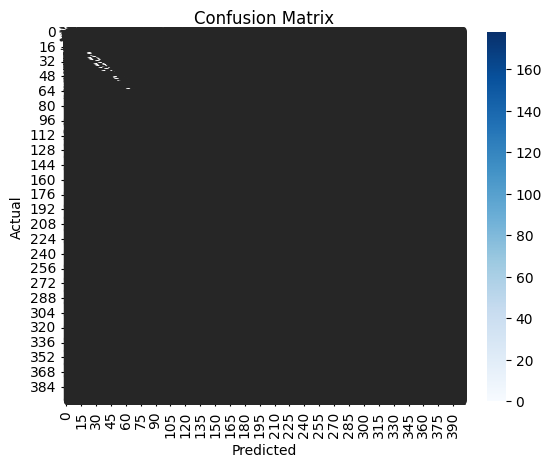

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the labels and predictions
labels_flat = np.array(labels).flatten()
preds_flat = np.array(preds).flatten()

# Classification report
print(classification_report(labels_flat, preds_flat))

# Confusion matrix
cm = confusion_matrix(labels_flat, preds_flat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# show a few examples

In [ ]:
print(val_dataset[0])

{'input_ids': tensor([  101,  2029,  5088,  2136,  3421,  1996, 10511,  2012,  3565,  4605,
         2753,  1029,   102,  3565,  4605,  2753,  2001,  2019,  2137,  2374,
         2208,  2000,  5646,  1996,  3410,  1997,  1996,  2120,  2374,  2223,
         1006,  5088,  1007,  2005,  1996,  2325,  2161,  1012,  1996,  2137,
         2374,  3034,  1006, 10511,  1007,  3410,  7573, 14169,  3249,  1996,
         2120,  2374,  3034,  1006, 22309,  1007,  3410,  3792, 12915,  2484,
         2050, 30102,  1523,  2184,  2000,  7796,  2037,  2353,  3565,  4605,
         2516,  1012,  1996,  2208,  2001,  2209,  2006,  2337,  1021,  1010,
         2355,  1010,  2012, 11902,  1005,  1055,  3346,  1999,  1996,  2624,
         3799,  3016,  2181,  2012,  4203, 10254,  1010,  2662,  1012,  2004,
         2023,  2001,  1996, 12951,  3565,  4605,  1010,  1996,  2223, 13155,
         1996,  3585,  5315,  2007,  2536,  2751,  1011, 11773, 11107,  1010,
         2004,  2092,  2004,  8184, 28324,  2075, 

In [ ]:
from transformers import AutoTokenizer

# Load your tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

num_examples = min(5, len(preds))

for i in range(num_examples):
    input_ids = val_dataset[i]["input_ids"]
    decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    true_label = labels[i]
    predicted_label = preds[i]
    print(f"Text: {decoded_text}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("-"*40)

Text: which nfl team represented the afc at super bowl 50? super bowl 50 was an american football game to determine the champion of the national football league ( nfl ) for the 2015 season. the american football conference ( afc ) champion denver broncos defeated the national football conference ( nfc ) champion carolina panthers 24a€ “ 10 to earn their third super bowl title. the game was played on february 7, 2016, at levi ' s stadium in the san francisco bay area at santa clara, california. as this was the 50th super bowl, the league emphasized the golden anniversary with various gold - themed initiatives, as well as temporarily suspending the tradition of naming each super bowl game with roman numerals ( under which the game would have been known as super bowl l ), so that the logo could prominently feature the arabic numerals 50.
True Label: [46 57 90 ... 41 78 79], Predicted Label: [ 46  57  91 ...  36  77 100]
----------------------------------------
Text: which nfl team represe

# using wandb.ai

In [ ]:
pip install wandb

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kajal-pourjalil77 (kajal-pourjalil77-i-k-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(
    project="bert-model-training",
    name="bert-base-run1",
    config={"model": "bert-base-uncased", "epochs": 3, "batch_size": 8}
)

##integrating wandb with the training

In [ ]:
!pip uninstall -y transformers
!pip cache purge

Found existing installation: transformers 4.40.1
Uninstalling transformers-4.40.1:
  Successfully uninstalled transformers-4.40.1
Files removed: 72


In [ ]:
!pip install transformers==4.40.1
!pip install datasets wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 111.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.1 which is incompatible.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="wandb",  # This is the key line
    logging_dir="./logs"
)

In [ ]:
from transformers import Trainer
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()
# Optionally resume from last checkpoint:
# trainer.train(resume_from_checkpoint=True)

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
cannot import name 'EncoderDecoderCache' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import wandb

# Login to W&B
wandb.login()

# Load data, tokenizer, model
model_name = "bert-base-uncased"  # or "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Load your dataset here
# train_dataset = ...
# val_dataset = ...

# Define training args
training_args = TrainingArguments(
    output_dir="./saved_model",  # where model checkpoints go
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to="wandb",  # Enable wandb logging
    run_name="bert-wandb-run"
)

# Optional metrics function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)



## save the model with wandb

In [ ]:
# Train and save
trainer.train()
model.save_pretrained("./content/drive/MyDrive/nlp project/bert-model-wandb")
tokenizer.save_pretrained("./content/drive/MyDrive/nlp project/bert-model-wandb")

## load the model with wandb

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = "./content/drive/MyDrive/nlp project/bert-model-wandb"

model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

## track evaluation metrics each epoch

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# evaluate on validation set and get metrics

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model)

# Evaluate on validation set
eval_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation results:", eval_results)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kajal-pourjalil77 (kajal-pourjalil77-i-k-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Validation results: {'eval_model_preparation_time': 0.0032, 'eval_runtime': 113.0057, 'eval_samples_per_second': 75.474, 'eval_steps_per_second': 9.442}


## plot loss per epoch

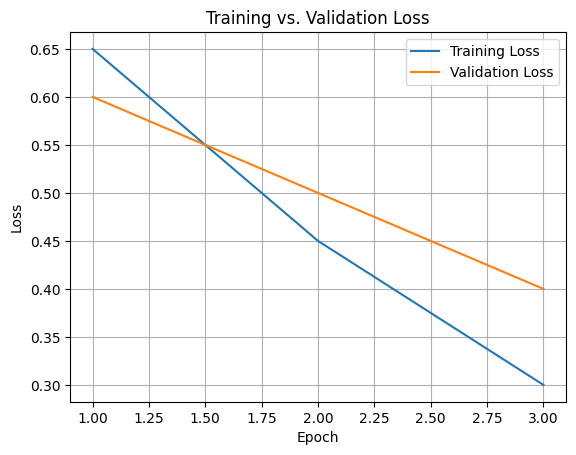

In [ ]:
# Simulated training/validation loss per epoch for example
train_loss = [0.65, 0.45, 0.30]
val_loss = [0.60, 0.50, 0.40]
epochs = list(range(1, len(train_loss) + 1))

import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")  # change average to "macro" or "micro" if preferred
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification

training_args = TrainingArguments(
    output_dir = "/content/drive/MyDrive/nlp project/bert_model_wandb",
    per_device_eval_batch_size = 8,
    logging_dir = "./logs",
    do_train=False,
    do_eval = True,
    report_to = "none"
)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # if defined
)

eval_results = trainer.evaluate()
print("Evaluatation results:", eval_results)

# Train model
# trainer.train()



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/nlp project/bert_model_wandb and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluatation results: {'eval_runtime': 31.6526, 'eval_samples_per_second': 269.457, 'eval_steps_per_second': 33.71}


In [ ]:
import pprint
pprint.pprint(trainer.state.log_history)

[{'eval_runtime': 31.6526,
  'eval_samples_per_second': 269.457,
  'eval_steps_per_second': 33.71,
  'step': 0}]


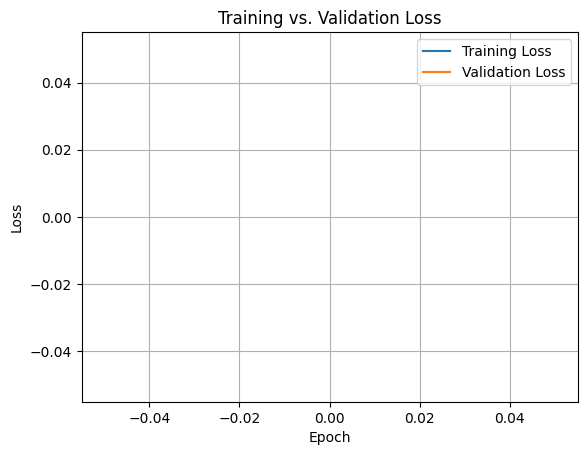

In [ ]:
# Extract logged history
history = trainer.state.log_history

# Separate out train/val loss per epoch
train_loss = [entry["loss"] for entry in history if "loss" in entry and "epoch" in entry]
val_loss = [entry["eval_loss"] for entry in history if "eval_loss" in entry and "epoch" in entry]
epochs = [entry["epoch"] for entry in history if "eval_loss" in entry]

# Plot
import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()